In [113]:
# import tensorflow as tf
import torch
from pyannote.audio import Pipeline

In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset



e:\New-Codes\Repositories\IdentifyMe-AI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:


cv_16_hi = load_dataset("mozilla-foundation/common_voice_16_0", "hi", split="train[:5%]+validation[:1%]+test[:1%]")




In [ ]:
# cv_16_en = load_dataset("mozilla-foundation/common_voice_16_0", "en", split="train[:0.1%]+validation[:0.1%]+test[:0.1%]")

In [4]:
# def extract_mel_spectrogram(audio_path, n_mels=128, hop_length=512, n_fft=2048):
#     y, sr = librosa.load(audio_path, sr=None)
#     S = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)
#     S_DB = librosa.power_to_db(S, ref=np.max)
#     return S_DB


In [109]:
cv_16_hi[0]

{'client_id': '0f018a99663f33afbb7d38aee281fb1afcfd07f9e7acd00383f604e1e17c38d6ed8adf1bd2ccbf927a52c5adefb8ac4b158ce27a7c2ed9581e71202eb302dfb3',
 'path': 'C:\\Users\\prash\\.cache\\huggingface\\datasets\\downloads\\extracted\\46da4d94bea6a89203c499f996e08c56bfc317143ef9e4a28fee1fee4a595e40\\hi_train_0/common_voice_hi_26008353.mp3',
 'audio': {'path': 'C:\\Users\\prash\\.cache\\huggingface\\datasets\\downloads\\extracted\\46da4d94bea6a89203c499f996e08c56bfc317143ef9e4a28fee1fee4a595e40\\hi_train_0/common_voice_hi_26008353.mp3',
  'array': array([ 6.46234854e-26, -1.35709319e-25, -8.07793567e-26, ...,
          1.06425944e-07,  4.46417090e-08,  2.61451660e-09]),
  'sampling_rate': 48000},
 'sentence': 'हमने उसका जन्मदिन मनाया।',
 'up_votes': 2,
 'down_votes': 0,
 'age': '',
 'gender': '',
 'accent': '',
 'locale': 'hi',
 'segment': '',
 'variant': ''}

In [51]:
c=0
for i in range(288):
    if cv_16_hi[i]["audio"]["sampling_rate"]!=48000:c+=1
print(c)

0


In [90]:
# path= r'C:\Users\prash\.cache\huggingface\datasets\downloads\extracted\46da4d94bea6a89203c499f996e08c56bfc317143ef9e4a28fee1fee4a595e40\hi_train_0\common_voice_hi_26008353.mp3'
path=cv_16_hi[0]['path']


In [91]:
path

'C:\\Users\\prash\\.cache\\huggingface\\datasets\\downloads\\extracted\\46da4d94bea6a89203c499f996e08c56bfc317143ef9e4a28fee1fee4a595e40\\hi_train_0/common_voice_hi_26008353.mp3'

In [106]:


def extract_mel_spectrogram(audio_path, n_mels=128, hop_length=512, n_fft=2048,sr=48000,sec=10):
    fixed_length=sec*sr
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)
    print(sr)
    # print(y)

    #  Initialize a new array with zeros
    adjusted_audio = np.zeros(fixed_length)

    # Truncate or pad the audio signal
    if len(y) > fixed_length:
        adjusted_audio = y[:fixed_length]  # Truncate to fixed length
    else:
        adjusted_audio[:len(y)] = y  # Pad with zeros

    y=adjusted_audio
    # Extract the Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)
    
    # Convert power spectrogram (amplitude squared) to decibel (dB) units
    S_DB = librosa.power_to_db(S, ref=np.max)
    
    return S_DB, sr



48000


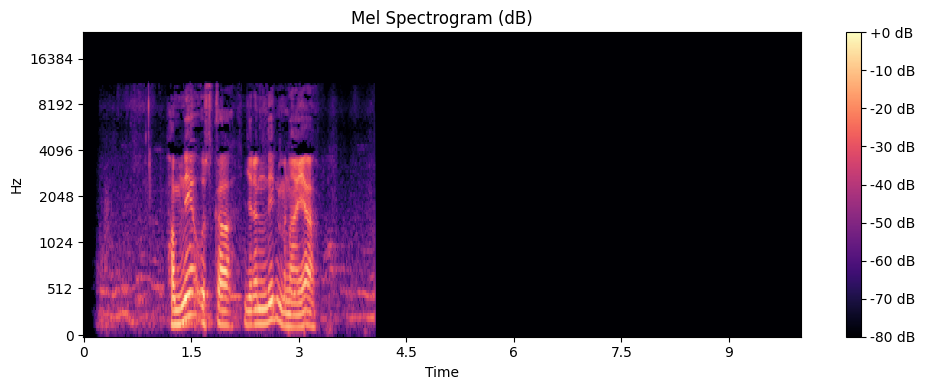

In [107]:
# Path to the audio file (replace this with your actual file path)
audio_file = path

# Extract Mel spectrogram
mel_spectrogram_db, sr = extract_mel_spectrogram(audio_file, n_mels=128, hop_length=512, n_fft=2048)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (dB)')
plt.tight_layout()
plt.show()


In [108]:
mel_spectrogram_db.shape

(128, 938)

In [125]:
type(cv_16_hi[0]['path'])

str

In [138]:
from pyannote.audio import Inference
from scipy.spatial.distance import cdist
# instantiate pretrained model
from pyannote.audio import Model
model = Model.from_pretrained("pyannote/wespeaker-voxceleb-resnet34-LM")
inference = Inference(model, window="whole")
embedding1 = inference(r"VoiceData\P1\Satendra\Satendra_P1_04.wav")
embedding2 = inference(r"VoiceData\P1\Prashasst\Prashasst_P1_01.wav")
# `embeddingX` is (1 x D) numpy array extracted from the file as a whole.


# Reshape embeddings to be 2D arrays (1 row, D columns)
embedding1_2d = embedding1.reshape(1, -1)
embedding2_2d = embedding2.reshape(1, -1)

# Calculate cosine distance between the two embeddings
distance = cdist(embedding1_2d, embedding2_2d, metric="cosine")[0, 0]
print(embedding2_2d.shape)

# `distance` is a float describing how dissimilar speakers 1 and 2 are
print(f"Cosine distance between speakers: {distance}")


# distance = cdist(embedding1, embedding2, metric="cosine")[0,0]
# `distance` is a `float` describing how dissimilar speakers 1 and 2 are.


(1, 256)
Cosine distance between speakers: 0.8042903255976922
